### Screencast

In the previous video, I brought a few questions we will be exploring throughout this lesson. First, let's take a look at the data, and see how we might answer the first question about how to break into the field of becoming a software developoer according to the survey results.

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy.  If we decided to build some basic plots, matplotlib might prove useful as well.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Part I/stackoverflow/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now to look at our first question of interest: What do those employed in the industry suggest to help others enter the field?  Looking at the `CousinEducation` field, you can see what these individuals would suggest to help others break into their field.  Below you can take a look at the full field that survey participants would see.

In [2]:
df2 = pd.read_csv('./Part I/stackoverflow/survey_results_schema.csv')
list(df2[df2.Column == 'CousinEducation']['Question'])

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [3]:
#Let's have a look at what the participants say
study = df['CousinEducation'].value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [4]:
# Oh this isn't what I was expecting, it is grouping items together if a participant provided 
# more than just one answer.  Let's see if we can clean this up.
# first to change this index column to a more appropriate name
study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
study.head()

,method,count
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


A quick look through data, allows us to create a list of all of the individual methods marked by a user.

In [5]:
# Here is a list of the different answers provided
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [6]:
#Now we want to see how often each of these individual values appears - I wrote 
# this function to assist with process - it isn't the best solution, but it gets
# the job done and our dataset isn't large enough to computationally hurt us too much.

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [7]:
# Now we can use our function and take a look at the results
# Looks like good news for Udacity - most individuals think that you 
# should take online courses


study_df = total_count(study, 'method', 'count', possible_vals)
study_df

,method,count
12,Take online courses,15246
1,Buy books and work through the exercises,11750
8,Part-time/evening courses,7517
3,Contribute to open source,7423
0,Bootcamp,5276
2,Conferences/meet-ups,5244
11,Return to college,5017
10,Participate in online coding competitions,3610
4,Get a job as a QA tester,3376
9,Participate in hackathons,2747


In [8]:
# We might also look at the percent

study_df['perc'] = study_df['count']/np.sum(study_df['count'])
study_df

,method,count,perc
12,Take online courses,15246,0.209432
1,Buy books and work through the exercises,11750,0.161408
8,Part-time/evening courses,7517,0.103260
3,Contribute to open source,7423,0.101968
0,Bootcamp,5276,0.072476
2,Conferences/meet-ups,5244,0.072036
11,Return to college,5017,0.068918
10,Participate in online coding competitions,3610,0.049590
4,Get a job as a QA tester,3376,0.046376
9,Participate in hackathons,2747,0.037735


We might want to take this one step further and say we care more about the methods that are suggested by those who earn more, or those who have higher job satisfaction.  Let's take a stab at incorporating that into this analysis.

In [9]:
# let's rewrite part of this function to get the mean salary for each method

def mean_amt(df, col_name, col_mean, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col_name - the column name you want to look through
    col_count - the column you want to count values from
    col_mean - the column you want the mean amount for
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    df_all - holds sum, square, total, mean, variance, and standard deviation for the col_mean
    '''
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    for val in look_for:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name].isnull()[idx] == False:
                if val in df[col_name][idx] and df[col_mean][idx] > 0:
                    new_df[val] += df[col_mean][idx]
                    squares_df[val] += df[col_mean][idx]**2 #Needed to understand the spread
                    denoms[val] += 1 
    
    # Turn into dataframes
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()
    
    # Change the column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']
    
    # Merge dataframes
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)
    
    # Additional columns needed for analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total'] - df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    return df_all

In [10]:
df_all = mean_amt(df, 'CousinEducation', 'Salary', possible_vals)

# To get a simple answer to our questions - see these two tables.

df_all.sort_values('mean_col', ascending=False)

,CousinEducation,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
3,Contribute to open source,1.392267e+08,2253,1.239062e+13,61796.145495,1.680845e+09,40998.103671,60103.214545,63489.076445
7,Other,4.491415e+07,738,3.851360e+12,60859.281694,1.514792e+09,38920.331073,58051.234411,63667.328977
5,Master's degree,4.284612e+07,721,3.771773e+12,59425.969277,1.699862e+09,41229.387609,56416.462517,62435.476037
11,Return to college,8.733691e+07,1474,7.243713e+12,59251.636145,1.403567e+09,37464.208781,57339.037276,61164.235014
0,Bootcamp,9.583229e+07,1622,8.502989e+12,59082.794998,1.751510e+09,41851.043917,57046.048671,61119.541325
9,Participate in hackathons,4.641498e+07,796,4.044473e+12,58310.277060,1.680908e+09,40998.879264,55462.070236,61158.483884
2,Conferences/meet-ups,9.699603e+07,1677,8.366275e+12,57839.015307,1.643482e+09,40539.886446,55898.701080,59779.329533
4,Get a job as a QA tester,5.852363e+07,1032,5.017250e+12,56708.940771,1.645773e+09,40568.122771,54233.792987,59184.088555
1,Buy books and work through the exercises,1.909928e+08,3393,1.624985e+13,56290.232211,1.620639e+09,40257.160560,54935.644033,57644.820390
12,Take online courses,2.415638e+08,4493,2.011544e+13,53764.488012,1.586442e+09,39830.167883,52599.825762,54929.150262


In [11]:
study_df

,method,count,perc
12,Take online courses,15246,0.209432
1,Buy books and work through the exercises,11750,0.161408
8,Part-time/evening courses,7517,0.103260
3,Contribute to open source,7423,0.101968
0,Bootcamp,5276,0.072476
2,Conferences/meet-ups,5244,0.072036
11,Return to college,5017,0.068918
10,Participate in online coding competitions,3610,0.049590
4,Get a job as a QA tester,3376,0.046376
9,Participate in hackathons,2747,0.037735


Although we can see the mean salary is highest for the individuals who say that you should contribute to open source, you might be asking - is that really a significant difference?  The salary differences don't see that large...

By the Central Limit Theorem, we know that the mean of any set of data will follow a normal distribution with a standard deviation equal to the standard deviation of the original data divided by the square root of the sample size, as long as we collect a large enough sample size.  With that in mind, we can consider two salaries significantly different if a second salary is two standard deviations or more away from the other.

Using the lower and upper bound components, we can get an idea of the salaries that are significantly different from one another.   

In [12]:
# Quiz - perform a similar analysis looking at career and job satisfaction for this individuals
# to determine which you want to be like

In [15]:
df_jobsat = mean_amt(df, 'CousinEducation', 'JobSatisfaction', possible_vals)

In [16]:
df_jobsat.sort_values('mean_col', ascending=False)

,CousinEducation,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
9,Participate in hackathons,14884.0,2073,115166.0,7.179932,4.003804,2.000951,7.093795,7.266070
7,Other,13797.0,1937,106521.0,7.122870,4.257489,2.063368,7.030980,7.214760
11,Return to college,27767.0,3904,212971.0,7.112449,3.965070,1.991248,7.049985,7.174912
4,Get a job as a QA tester,21294.0,3000,162716.0,7.098000,3.857063,1.963941,7.027721,7.168279
3,Contribute to open source,42374.0,5999,324340.0,7.063511,4.172496,2.042669,7.011820,7.115202
2,Conferences/meet-ups,30868.0,4371,236106.0,7.062000,4.144635,2.035838,7.001645,7.122354
0,Bootcamp,30404.0,4307,231670.0,7.059206,3.956792,1.989169,6.999799,7.118613
1,Buy books and work through the exercises,66788.0,9492,508944.0,7.036241,4.109517,2.027194,6.995459,7.077023
8,Part-time/evening courses,42797.0,6100,324829.0,7.015902,4.027780,2.006933,6.965537,7.066266
12,Take online courses,85746.0,12222,651056.0,7.015709,4.049009,2.012215,6.980035,7.051384


In [26]:
pd.DataFrame(np.hstack([df_jobsat, df_all]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Bootcamp,30404,4307,231670,7.05921,3.95679,1.98917,6.9998,7.11861,Bootcamp,9.58323e+07,1622,8.50299e+12,59082.8,1.75151e+09,41851,57046,61119.5
1,Buy books and work through the exercises,66788,9492,508944,7.03624,4.10952,2.02719,6.99546,7.07702,Buy books and work through the exercises,1.90993e+08,3393,1.62499e+13,56290.2,1.62064e+09,40257.2,54935.6,57644.8
2,Conferences/meet-ups,30868,4371,236106,7.062,4.14463,2.03584,7.00165,7.12235,Conferences/meet-ups,9.6996e+07,1677,8.36627e+12,57839,1.64348e+09,40539.9,55898.7,59779.3
3,Contribute to open source,42374,5999,324340,7.06351,4.1725,2.04267,7.01182,7.1152,Contribute to open source,1.39227e+08,2253,1.23906e+13,61796.1,1.68084e+09,40998.1,60103.2,63489.1
4,Get a job as a QA tester,21294,3000,162716,7.098,3.85706,1.96394,7.02772,7.16828,Get a job as a QA tester,5.85236e+07,1032,5.01725e+12,56708.9,1.64577e+09,40568.1,54233.8,59184.1
5,Master's degree,14459,2091,108711,6.91487,4.17448,2.04316,6.8273,7.00245,Master's degree,4.28461e+07,721,3.77177e+12,59426,1.69986e+09,41229.4,56416.5,62435.5
6,None of these,3000,433,22898,6.92841,4.8794,2.20894,6.72034,7.13647,None of these,5.37709e+06,112,4.27319e+11,48009.7,1.51042e+09,38864.1,40812,55207.4
7,Other,13797,1937,106521,7.12287,4.25749,2.06337,7.03098,7.21476,Other,4.49141e+07,738,3.85136e+12,60859.3,1.51479e+09,38920.3,58051.2,63667.3
8,Part-time/evening courses,42797,6100,324829,7.0159,4.02778,2.00693,6.96554,7.06627,Part-time/evening courses,1.12454e+08,2117,9.29078e+12,53119.6,1.56696e+09,39584.9,51433.4,54805.9
9,Participate in hackathons,14884,2073,115166,7.17993,4.0038,2.00095,7.09379,7.26607,Participate in hackathons,4.6415e+07,796,4.04447e+12,58310.3,1.68091e+09,40998.9,55462.1,61158.5


In [24]:
pd.DataFrame?

In [27]:
df_jobsat.col_total

0      4307
1      9492
2      4371
3      5999
4      3000
5      2091
6       433
7      1937
8      6100
9      2073
10     2675
11     3904
12    12222
Name: col_total, dtype: int64

In [70]:
df_dotplot = pd.DataFrame(np.array(['Method', "At least Master's", "Less Than Master's", 
"Master's Degree",0.0589517,0.0293459,
"Bootcamp",0.0746172,0.071824,
"Become QA Tester",0.0484688,0.0457388,
"Buy Books",0.162073,0.161205,
"None of these",0.00836278,0.00827705,
"Part Time Courses",0.103298,0.103248,
"Return to College",0.0687279,0.0689754,
"Online Courses",0.207892,0.2099,
"Contribute to Opensource",0.097821,0.10323,
"Coding Competitions",0.0453475,0.0508806,
"Other",0.0269729,0.0338607,
"Hackathons", 0.0316254,0.0395937,
"Conferences", 0.0658422, 0.0739201]).reshape((14, 3)))

In [71]:
df_dotplot.columns = df_dotplot.iloc[0]

In [72]:
df_dotplot.drop(0, inplace=True)

In [42]:
import seaborn as sns

In [ ]:
df_dotplot.prop = df_dotplot.prop.astype(float)

In [48]:
df_dotplot = df_dotplot.melt(id_vars='Method', value_name='prop', var_name='status')

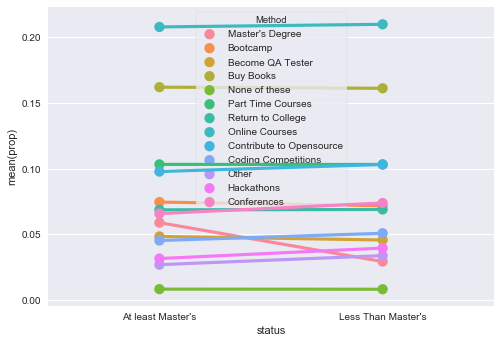

In [69]:
sns.pointplot(data=df_dotplot, x='status', y='prop', hue='Method');


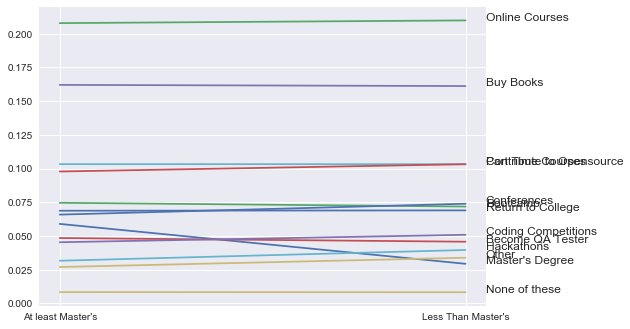

In [77]:
for idx, row in df_dotplot.iterrows():
    plt.plot([0,1],[row["At least Master's"], row["Less Than Master's"]]);
    plt.text(1.05, row["Less Than Master's"], row['Method']);
plt.xticks([0,1], ["At least Master's", "Less Than Master's"]);

In [75]:
for row in df_dotplot:
    print(row)

Method
At least Master's
Less Than Master's
